In [2]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import astropy.coordinates as coord
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':16})
from astropy.io import fits
import ebf
import pdb
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic
from astropy import units as u1
from astropy.coordinates import SkyCoord
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from itertools import groupby
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import poisson
from scipy.optimize import minimize

Running a galaxia simulation for halo17 with mag ranging from 14-20 mag, r < 1000 kpc, fsample 0.1, popID10.

In [3]:
data=ebf.read('halo17'+'.ebf') #reads in ebf file for galaxia output
df=pd.DataFrame() #creates empty pandas DataFrame
   
keys=data.keys() #creates list of keys for the ebf file
    

In [3]:
satidflag = np.loadtxt('halo17_bound.txt')

In [5]:
flag2 = np.loadtxt('halo17_bound_circ.txt')

In [6]:
data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf')


In [36]:
data2

{'nsat': array([  0,   0, 113,   0,   0, 102,   0, 104, 159,  97, 168,   0, 102,
          0, 211, 155,   0, 155,   0,   0, 149], dtype=int32),
 'nsatc': array([   0,    0,    0,    0,    0,  113,    0,  215,  416,  319,  575,
           0,  743,    0,  845, 1056,    0, 1211,    0,    0, 1366],
       dtype=int32),
 'tsat': array([ 0.313,  0.313,  0.313, ..., 12.9  , 13.   , 13.   ], dtype=float32),
 'jsat': array([0.507, 0.329, 0.571, ..., 0.021, 0.167, 0.518], dtype=float32),
 'lsat': array([4.5682450e+05, 4.6837606e+05, 2.2339744e+08, ..., 3.8119658e+03,
        1.0873786e+04, 2.6693228e+03], dtype=float32),
 'msat': array([1.64e+09, 5.48e+08, 6.97e+10, ..., 2.23e+08, 1.12e+09, 2.01e+08],
       dtype=float32),
 'bsat': array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 'esat': array([0.444, 0.601, 0.576, ..., 0.679, 0.424, 0.684], dtype=float32),
 'log': array([b'Properties of each satellite are stored in a linear list\nProperty lists are as follows\n    Tsat = time since accretion (Gyr

In [44]:
idt = range(np.min(data['satid']),np.max(data['satid'])+1,1)

In [46]:
np.max(idt)

1365

In [ ]:
data2['msat'][1211:(1515-149)] < 0.4e11

In [49]:
idlowmass = np.unique(data['satid'])[data2['msat'][1211:(1515-149)] < 0.4e11]

In [50]:
idlowmass

array([1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
       1222, 1224, 1226, 1227, 1229, 1230, 1231, 1232, 1233, 1234, 1235,
       1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246,
       1247, 1248, 1249, 1250, 1251, 1252, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1268, 1269, 1270, 1271,
       1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282,
       1283, 1284, 1285, 1286, 1287, 1289, 1290, 1291, 1292, 1293, 1294,
       1295, 1296, 1297, 1298, 1300, 1301, 1302, 1303, 1304, 1305, 1306,
       1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317,
       1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328,
       1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350,
       1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361,
       1362, 1363, 1364, 1365], dtype=int32)

In [38]:
np.max(data['satid'])

1365

In [3]:
def make_csv(data_name, deg,num,particle): #string, float (rotation angle in degrees)
    import ebf
    import pandas as pd
    import numpy as np

    
    rot=deg*np.pi/180. #angle in radians
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf')
   
    
    data=ebf.read(data_name+'.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
   
    keys=data.keys() #creates list of keys for the ebf file
    
    if particle == True:
        cut = (data['partid']==0)
    else:
        cut = ()
    
    idlowmass = np.unique(data['satid'])[data2['msat'][1211:(1515-149)] < 0.4e11]
    flagi = np.unique(data['satid'])[np.where(satidflag == 0)]
    flag = flagi[np.isin(flagi,idlowmass)]
    
    #for ii in range(1,len(list(data.keys()))): #for each list in the ebf file, create a dataframe column with that key as a column name
       # s=pd.Series(data[name])
        #print (s)
        
        #df[list(data.keys())[ii]]=data[list(data.keys())[ii]]
        #print (s)
    
    index = range(0,len(data['smass'][cut][np.isin(data['satid'][cut],flag)]),1)
    indexi = np.random.choice(index, num, replace=False)
    
    
    df['smass']=data['smass'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    df['age']=data['age'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['rad']= data['rad'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    df['mag0']= data['mag0'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['mag1']= data['mag1'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['mag2']= data['mag2'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['popid']= data['popid'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['satid']= data['satid'][cut][np.isin(data['satid'][cut],flag)][indexi]
    #df['fieldid']=data['fieldid']
    #df['partid']=data['partid']
    #df['center']=data['center']
    df['lum']= data['lum'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['teff']= data['teff'][cut][np.isin(data['satid'][cut],flag)][indexi]
       
    #set original output positions and velocities as xx_0. These are in the unrotated frame where x-axis does not always point to galactic center
    df['glon_0']= data['glon'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['glat_0']= data['glat'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['px_0']= data['px'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['py_0']= data['py'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['pz_0']= data['pz'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['vx_0']= data['vx'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['vy_0']= data['vy'][cut][np.isin(data['satid'][cut],flag)][indexi]  
    df['vz_0']= data['vz'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    
    
    
    
    #print (df['glon_0'],df['glon'])

    #set outputs by rotating so x-axis points to galactic center
    df['glon']=(df['glon_0']-deg)%360
    df['glat']=df['glat_0']
    df['px']=df['px_0']*np.cos(rot)+df['py_0']*np.sin(rot)
    df['py']=-df['px_0']*np.sin(rot)+df['py_0']*np.cos(rot)
    df['pz']=df['pz_0']
    df['vx']=df['vx_0']*np.cos(rot)+df['vy_0']*np.sin(rot)
    df['vy']=-df['vx_0']*np.sin(rot)+df['vy_0']*np.cos(rot)
    df['vz']=df['vz_0']
    
    
    
    #set original center values
    o_cen=np.full(len(df['glon']), np.nan)
 
    o_cen[0:6]=[-8.0, 0.0, 0.015, 11.1, 239.08, 7.25]
    df['orig_center']=o_cen

    df.to_csv(data_name+'bound.csv', index=False) #save as CSV with same base name that can be opened in python 3
    return df



In [6]:
testd = make_csv('halo17', 0,6000,False)

In [21]:
len(testd['px'])

2000

In [4]:
def get_coord_obj_rot(data): #pandas DataFrame
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    
    v_sun_gc=[data['orig_center'][3], data['orig_center'][4], data['orig_center'][5]] #galactocentric sun coordinates, based on original heliocentric x-axis aligned with galactocentric X-axis

    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc, #galactic frame cartesian coordinate object
                       U=vx*u.km/u.s, V=vy*u.km/u.s, W=vz*u.km/u.s, frame='galactic', 
                       representation_type='cartesian', differential_type='cartesian')
    gal.representation_type='spherical' #change type to spherical (l, b, proper motions, rad vel, etc)
    gal.differential_type=coord.representation.SphericalCosLatDifferential

    return gal #return coordinate object

#TURNS A DATAFRAME OF STARS INTO ASTROPY COORDINATE OBJECT, GALACTIC FRAME (HELIOCENTRIC X-AXIS TO GC), TAKING INTO ACCOUNT THE SOLAR REFLEX MOTION
def get_coord_obj_rot_gsr(data):
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    # v_sun_gl=[data['center'][3], data['center'][4], data['center'][5]]
    v_sun_gc=[11.1, 239.08, 7.25] #galactocentric sun coordinates
    v_sun=coord.CartesianDifferential(v_sun_gc*u.km/u.s) #turn into a coordinate cartesian differential
    
   
    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc,
                       U=(vx+v_sun_gc[0])*u.km/u.s, V=(vy+v_sun_gc[1])*u.km/u.s, W=(vz+v_sun_gc[0])*u.km/u.s, frame='galactic',
                       representation_type='cartesian', differential_type='cartesian') #adds solar velocity to star velocity for calculating gsr frame parameters
    
    gal.representation_type='spherical' #convert to spherical representation (l, b, distance)
    
    gal.differential_type=coord.representation.SphericalCosLatDifferential #convert differentials to spherical cos lat (proper motions, radial velocity)
    print (gal)
    return gal

#takes an angle and returns corresponding angle within limits. If no minparam give, returns angle between (0,2*pi)/(0,360)
#if minval is given returns angle between (minval, minval+2*pi)/(minval, minval+360). Ex if minval=-pi, range will be (-pi, pi)
def limrange(angle, *minparam, **degflag):    #float, float, bool (deg=True/False)
    import numpy as np
    if len(minparam) == 0: minval = 0.0
    else: minval = minparam[0]
    
    if ('deg' in degflag):
        newangle = (angle-minval)%(360.0)+minval
    else:   
        newangle = (angle-minval)%(2.0*np.pi)+minval
        
    return newangle

#add radial velocity, l, b, dist, proper motions, v_gsr, pm_gsr, v_t, v_t_gsr, dist modulus to CSV
def rv_csv(halo, field, deg): #string, string, int
    import pandas as pd
    import numpy as np
    #NAME OF CSV FILE
    if deg%1==0: #if deg is integer use make string
        d=str(int(deg))
    else:
        d="{0:.2f}".format(deg) #else round to 2 decimals and make string
    data_name=halo+'/'+d+'/'+field+'/'+halo+'_'+field+'_'+d
    #OPEN CSV
    data=pd.read_csv(data_name+'.csv')
    #GALACTOCENTRIC SOLAR VELOCITY WITH SUN ON X-AXIS
    v_sun_gc=[11.1, 239.08, 7.25]
    #CREATE ASTROPY COORD OBJECT
    gal=get_coord_obj_rot(data)
    gal_gsr=get_coord_obj_rot_gsr(data)
    #ASSIGN TO DATAFRAME
    data=data.assign(l_coord=gal.l.degree)
    data=data.assign(b_coord=gal.b.degree)
    data=data.assign(pm_l_cosb=gal.pm_l_cosb)
    data=data.assign(pm_b=gal.pm_b)
    data=data.assign(pm_mag=np.sqrt(np.add(np.square(data.pm_b),np.square(data.pm_l_cosb))))
    data=data.assign(r_v=gal.radial_velocity)
    data=data.assign(dist=gal.distance)
    data=data.assign(dm=5.*np.log10(gal.distance.value*1000.)-5.)
    data=data.assign(v_l=4.74047*gal.pm_l_cosb*gal.distance)
    data=data.assign(v_b=4.74047*gal.pm_b*gal.distance)
    data=data.assign(v_t=np.sqrt(np.add(np.square(data.v_l),np.square(data.v_b))))
    data=data.assign(pm_l_cosb_gsr=gal_gsr.pm_l_cosb)
    data=data.assign(pm_b_gsr=gal_gsr.pm_b)
    data=data.assign(pm_mag_gsr=np.sqrt(np.add(np.square(data.pm_b_gsr),np.square(data.pm_l_cosb_gsr))))
    data=data.assign(v_gsr=gal_gsr.radial_velocity)
    data=data.assign(v_l_gsr=4.74047*gal_gsr.pm_l_cosb*gal_gsr.distance)
    data=data.assign(v_b_gsr=4.74047*gal_gsr.pm_b*gal_gsr.distance)
    data=data.assign(v_t_gsr=np.sqrt(np.add(np.square(data.v_l_gsr),np.square(data.v_b_gsr))))
    #SAVE NEW CSV WITH SAME NAME TO REPLACE
    data.to_csv(data_name+'.csv', index=False)
    



In [1]:
rad_t = get_coord_obj_rot_gsr(testd)

NameError: name 'get_coord_obj_rot_gsr' is not defined

In [9]:
gctest = get_coord_obj_rot(testd)

In [28]:
gc1 = rad_t.transform_to(coord.Galactocentric)

In [25]:
gc2 = gctest.transform_to(coord.Galactocentric)

NameError: name 'coord' is not defined

In [ ]:
gc2.galactic

In [29]:
rad_t.radial_velocity

<Quantity [ 24.68798297, 227.4217406 ,  -4.18732053, ...,  85.96278539,
            98.44770831,  15.66443134] km / s>

In [30]:
r2= np.sqrt(gc1.x**2+gc1.y**2+gc1.z**2)

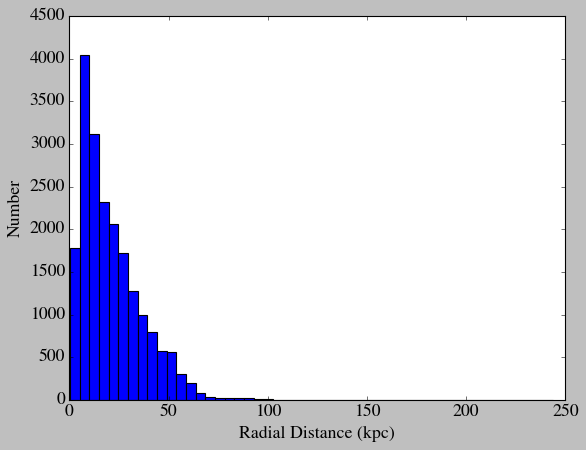

In [31]:
plt.hist(testd['rad'],bins=50)
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Number')
plt.show()

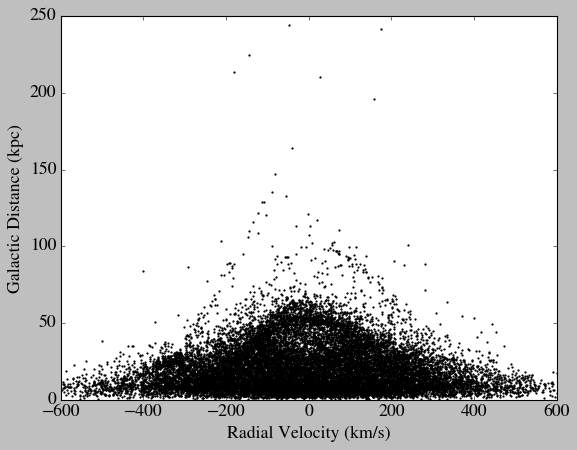

In [32]:
#plotting distance versus vrad (compared to Bullock 2005)

plt.scatter(rad_t.radial_velocity/u1.km*u1.s,testd['rad'],s=1,c='b')
plt.ylabel('Galactic Distance (kpc)')
plt.xlabel('Radial Velocity (km/s)')
plt.xlim(-600,600)
plt.ylim(0,250)
plt.show()
plt.show()

In [33]:
len(gc1.x)

20000

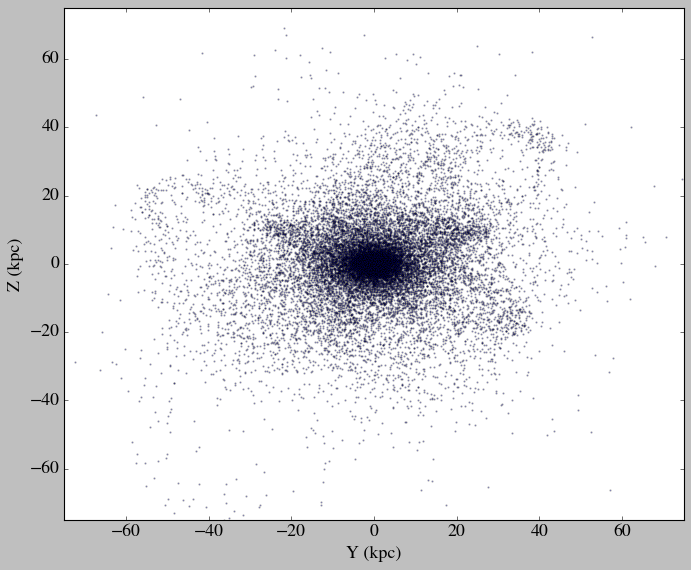

In [34]:
#plotting the x, y position for the selected 30000 sample
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.scatter(gc1.y,gc1.z,s=1,alpha=0.3)
ax.set_xlabel('Y (kpc)')
ax.set_ylabel('Z (kpc)')
#ax.set_zlabel('Z (kpc)')
ax.set_ylim(-75,75)
ax.set_xlim(-75,75)
#ax.set_zlim(-75,75)
#plt.savefig('3d.png')
plt.show()

# Velocity dispersion

In [4]:
# Function for calculating the space separation and the velocity difference in each shell

def v_diff(spaces,data,interval):
    
    '''
        :param spaces: Scale for space sparation   
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation
   
        
    '''
    
    vdiffh = []
    rlim = []
    num = []
    spect = []
    kk=0
    for ii in range(int(20),int(80),interval):
        
        rlim.append(ii)
        zmin = ii
        zmax = ii+interval
        dfx=pd.DataFrame()
        dfxf = pd.DataFrame()
        dfx['x']=data['x'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['y']=data['y'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['z']=data['z'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['Vgal']= data['Vgal'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['SimbadName']= data['SimbadName'][ (zmin < data['r'] ) & (data['r'] < zmax )]
       
        dfx['r']= data['r'][ (zmin < data['r'] ) & (data['r'] < zmax )]
        dia=[]
        vdiff = []
        spacedt = []
        num.append(len(dfx['r']))
        dfx2 = dfx.sort_values(by=['SimbadName'])
        
        indexp = [x for x in data.index if x not in dfx2.index]
        indexs = np.append(np.array(dfx2.index),np.array(indexp))
        
        dfxf = data.loc[indexs]
        
        
        #print (dfx2['r'])
        k = Comp(dfx2['x'],dfx2['y'],dfx2['z'],dfx2['Vgal'])
        k2 = Comp(dfxf['x'],dfxf['y'],dfxf['z'],dfxf['Vgal'])
        
        print (k.rv,k2.rv)
        #vsort = k.rv[np.argsort(dfx['r'])]
        #xsort = k.x[np.argsort(dfx['r'])]
        #ysort = k.y[np.argsort(dfx['r'])]
        #zsort = k.z[np.argsort(dfx['r'])]
       # print ('v1',k.rv,k.x)
        #print ('v2',k2.rv,k2.x)
        
        
            
        #calculating the velocity difference and space separation for each shell
        for jj in range(0,len(k.rv)): 
            
            #print (k.rv,k2.rv)
           
            
            vi = np.repeat(k.rv[jj],len(k2.rv))
            xi = np.repeat(k.x[jj],len(k2.rv))
            yi = np.repeat(k.y[jj],len(k2.rv))
            zi = np.repeat(k.z[jj],len(k2.rv))
            print (len(vi))
        
            diffv = (vi - k2.rv)**2
            diffx = (xi - k2.x)**2
            diffy = (yi - k2.y)**2
            diffz = (zi - k2.z)**2
        
        
            diff = diffv+diffx+diffy+diffz
            spaced = diffx+diffy+diffz
          
            
            dia.append(diff)
            vdiff.append(vi - k2.rv)
            spacedt.append(np.sqrt(spaced))
        #print (len(vdiff))
        
        
        
        
        #diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
        vdiffto = np.array(vdiff)[np.triu_indices(len(k.rv),1)]
        specdto = np.array(spacedt)[np.triu_indices(len(k.rv),1)]
         
        spect.append(specdto)
        
        print (len(vdiffto),len(specdto))
        
        vdiffh.append(vdiffto[specdto < spaces[kk]])
       
        kk=kk+1
        
    return rlim,vdiffh,num,spect
        
        

In [5]:
zmin = 20
zmax = 100
zlim = 4.

In [8]:
ra = r2/u1.kpc

NameError: name 'r2' is not defined

In [6]:
r2= ra

NameError: name 'ra' is not defined

In [7]:
vral = rad_t.radial_velocity/u1.km*u1.s

NameError: name 'rad_t' is not defined

In [6]:
testd = pd.read_csv('halo17bound.csv')

In [7]:
groupidi = range(0,len(testd))

In [8]:
np.array(groupidi)[ (zmin < r2) & (r2 < zmax )]

NameError: name 'r2' is not defined

In [9]:
# cutting r and z > 20 & r < 60 kpc stars 
df1=pd.DataFrame()
df2=pd.DataFrame()
df3 = pd.DataFrame()
df1['x']=gc1.x[ (zmin < r2 ) & (r2 < zmax ) ]
df1['y']=gc1.y[ (zmin < r2 ) & (r2< zmax ) ]
df1['z']=gc1.z[ (zmin < r2 ) & (r2 < zmax ) ]
df1['Vgal']= vral[ (zmin <r2 ) & (r2 < zmax ) ]
df1['r']= r2[ (zmin < r2) & (r2 < zmax )]
df1['starid']= np.array(groupidi)[ (zmin < r2) & (r2 < zmax )]
df1['index']= np.arange(0,len(df1['r']),1)

#print (df1['index'])
df2['r']=df1['r'][(np.absolute(df1['z']) > zlim)]
df2['x']=df1['x'][(np.absolute(df1['z']) > zlim)]
df2['y']=df1['y'][(np.absolute(df1['z']) > zlim) ]
df2['z']=df1['z'][(np.absolute(df1['z']) > zlim)]
df2['Vgal']= df1['Vgal'][(np.absolute(df1['z']) > zlim)]
df2['starid']= df1['starid'][(np.absolute(df1['z']) > zlim)]
df2['index']= np.arange(0,len(df2['r']),1)

NameError: name 'gc1' is not defined

In [11]:
df3 = pd.read_csv('df3_60000_nolowmass.csv')

In [12]:
df3

,Unnamed: 0,r,x,y,z,Vgal,starid,index,satid
0,0,43.170820,-27.278933,-31.423080,-11.496500,-210.444365,2,0,NaN
1,1,28.560262,-13.566388,22.383819,11.428314,-332.935416,3,1,NaN
2,2,47.650375,-34.566199,-32.452495,-4.750976,-141.446946,6,2,1223.0
3,3,27.210058,-5.341291,-24.289064,-11.040797,337.814596,9,3,1224.0
4,4,30.872822,5.218061,-26.245117,-15.397949,214.113554,11,4,NaN
5,5,21.002389,11.576162,3.245883,17.220832,119.965248,13,5,NaN
6,6,25.622908,-15.636133,18.035489,9.314821,-329.335557,18,6,1223.0
7,8,22.091047,10.144653,-5.514535,-18.833222,-47.286903,22,7,NaN
8,9,44.212154,33.140765,22.304417,-18.945111,36.834438,28,8,1260.0
9,10,40.145070,27.490977,28.674759,-5.799227,59.790087,33,9,NaN


In [13]:
#class for the input of the correlation function 
class Comp:
    def __init__(self,x,y,z,rv,groupid):
        '''
        class for the input of the correlation function 
        :param x: x position for the target 
        :param y: y position for the target 
        :param z: z position for the target
        :param rv: radial velocity for the target 
        
        '''

        self.x = np.array(x)
        self.y = np.array(y)
        self.z = np.array(z)
        self.rv = np.array(rv)
        self.groupid = np.array(groupid)



In [14]:
# Function for calculating the space separation and the velocity difference in each shell

def v_diff(spaces,data,interval):
    
    '''
        :param spaces: Scale for space sparation   
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation
   
        
    '''
    
    vdiffh = []
    rlim = []
    num = []
    spect = []
    indexout = []
    n=0
    for ii in range(int(20),int(70),interval):
        
        rlim.append(ii)
        zmin = ii
        zmax = ii+interval
        dfx=pd.DataFrame()
        dfxf = pd.DataFrame()
        dfx['x']=data['x'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        #print (dfx['x'])
        dfx['y']=data['y'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['z']=data['z'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['Vgal']= data['Vgal'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['index']= data['index'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
       
        dfx['r']= data['r'][ (zmin < data['r'] ) & (data['r'] < zmax )]
        indexf=[]
        vdiff = []
        spacedt = []
        num.append(len(dfx['r']))
        dfx2 = dfx.sort_values(by=['index'])
        
        indexp = [x for x in data.index if x not in dfx2.index]
        indexs = np.append(np.array(dfx2.index),np.array(indexp))
        
        dfxf = data.loc[indexs]
        
        #print (dfx2,dfxf)
        
        #print (dfx2['r'])
        k = Comp(dfx2['x'],dfx2['y'],dfx2['z'],dfx2['Vgal'],dfx2['index'])
        k2 = Comp(dfxf['x'],dfxf['y'],dfxf['z'],dfxf['Vgal'],dfxf['index'])
        
        #print (k.rv,k2.rv)
        #vsort = k.rv[np.argsort(dfx['r'])]
        #xsort = k.x[np.argsort(dfx['r'])]
        #ysort = k.y[np.argsort(dfx['r'])]
        #zsort = k.z[np.argsort(dfx['r'])]
       # print ('v1',k.rv,k.x)
        #print ('v2',k2.rv,k2.x)
        
        
            
        #calculating the velocity difference and space separation for each shell
        for jj in range(0,len(k.rv)): 
            
            #print (k.rv,k2.rv)
           
            
            vi = np.repeat(k.rv[jj],len(k2.rv))
            xi = np.repeat(k.x[jj],len(k2.rv))
            yi = np.repeat(k.y[jj],len(k2.rv))
            zi = np.repeat(k.z[jj],len(k2.rv))
            
            
            
        
            diffv = (vi - k2.rv)**2
            diffx = (xi - k2.x)**2
            diffy = (yi - k2.y)**2
            diffz = (zi - k2.z)**2
            indext = [] 
            for kk in range(0,len(k2.groupid)):
                indext.append(str(k.groupid[jj])+'-'+str(k2.groupid[kk]))
        
        
            #diff = diffv+diffx+diffy+diffz
            spaced = diffx+diffy+diffz
          
            indexf.append(indext)
            #dia.append(diff)
            vdiff.append(vi - k2.rv)
            spacedt.append(np.sqrt(spaced))
        #print (len(vdiff))
        
        
        
        
        #diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
        
        vdiffto = np.array(vdiff)[np.triu_indices(len(k.rv),1)]
        specdto = np.array(spacedt)[np.triu_indices(len(k.rv),1)]
        indexfo = np.array(indexf)[np.triu_indices(len(k.rv),1)]    
        spect.append(specdto)
        indexout.append(indexfo[specdto < spaces])
        
        #print (len(vdiffto),len(specdto))
        
        vdiffh.append(vdiffto[specdto < spaces])
       
        n=n+1
        
    return rlim,vdiffh,num,spect,indexout
        
        
        
        

In [15]:
rlimf = []
test1f = []
numf =[]
sepf = []
indexf= [] 

for scale in range(2,8,2):
    
    rlim,test1,num,sep,indexii = v_diff(scale,df3,8)
    rlimf.append(rlim)
    test1f.append(test1)
    numf.append(num)
    sepf.append(sep)
    indexf.append(indexii)
    
    
    

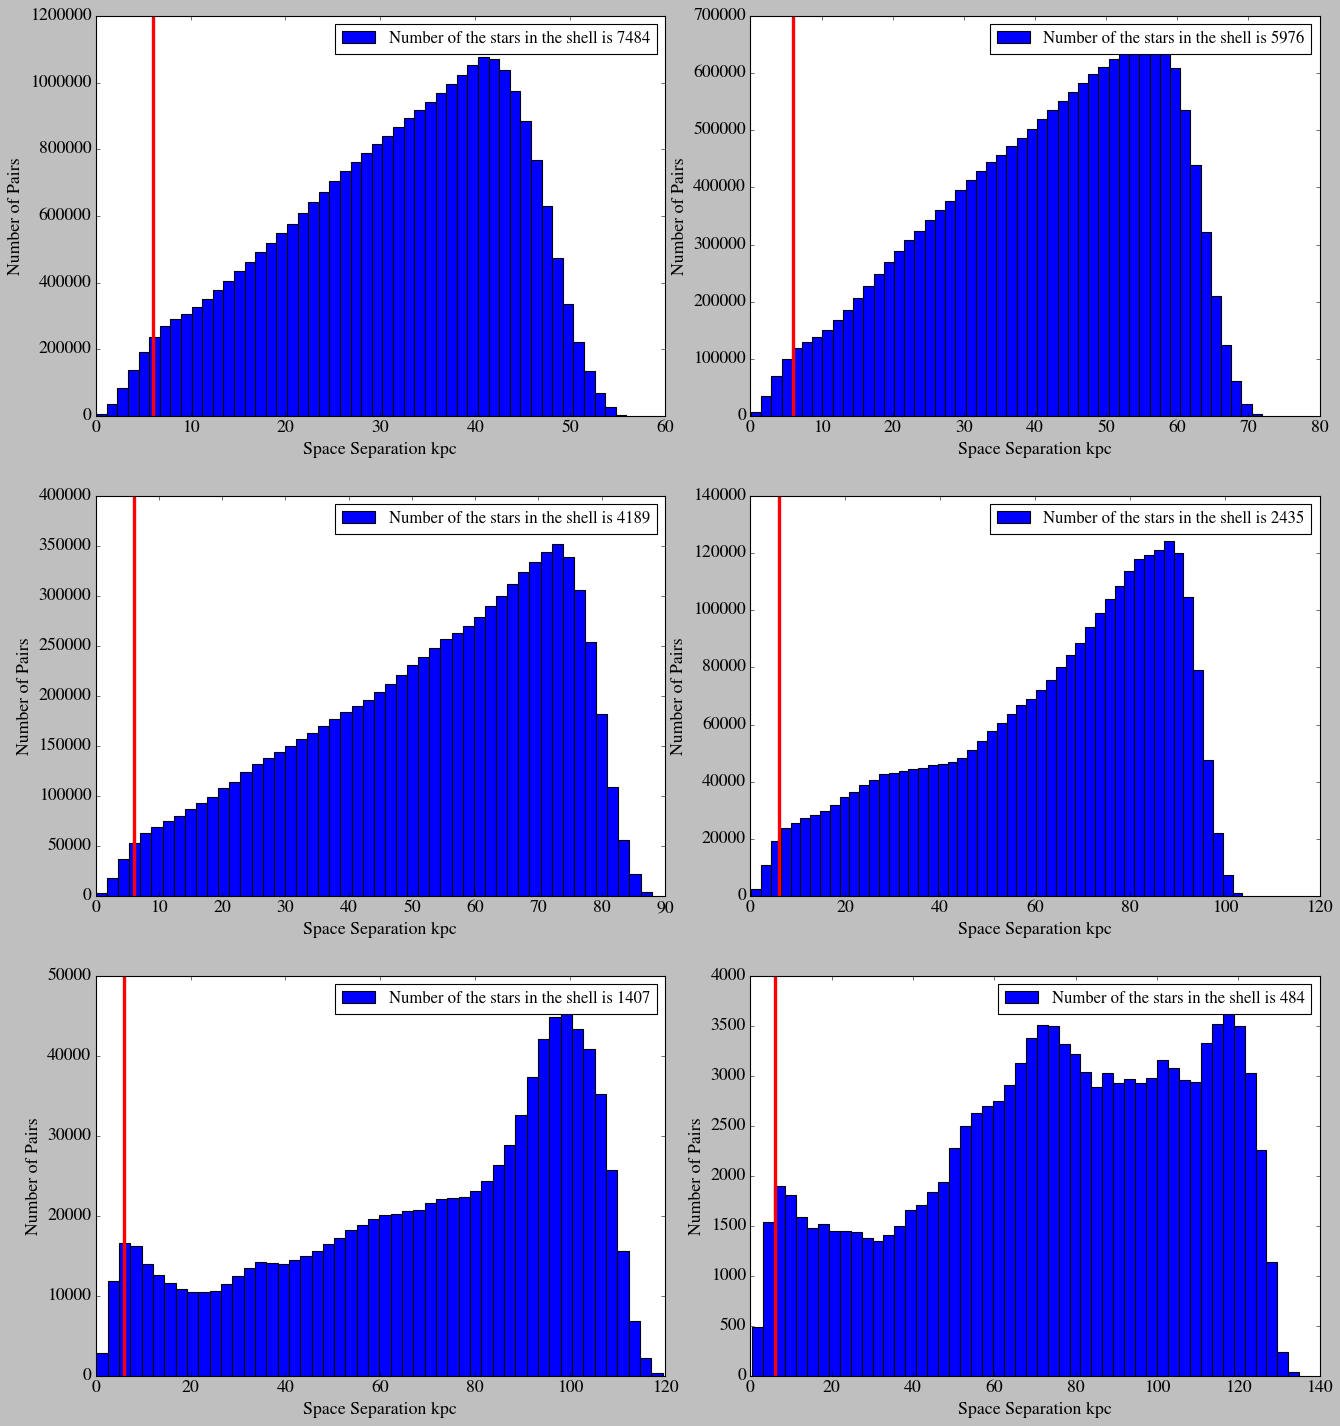

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(sep[k], bins=50, label='Number of the stars in the shell is '+str(num[k]))
            
        ax[index][jndex].axvline(6,linewidth = 3,c= 'r')
        ax[index][jndex].set_xlabel('Space Separation kpc')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend(loc=1, prop={'size': 15})
        
            
            
        k = k + 1
plt.savefig('halo09_space_bound.png')            
plt.show()

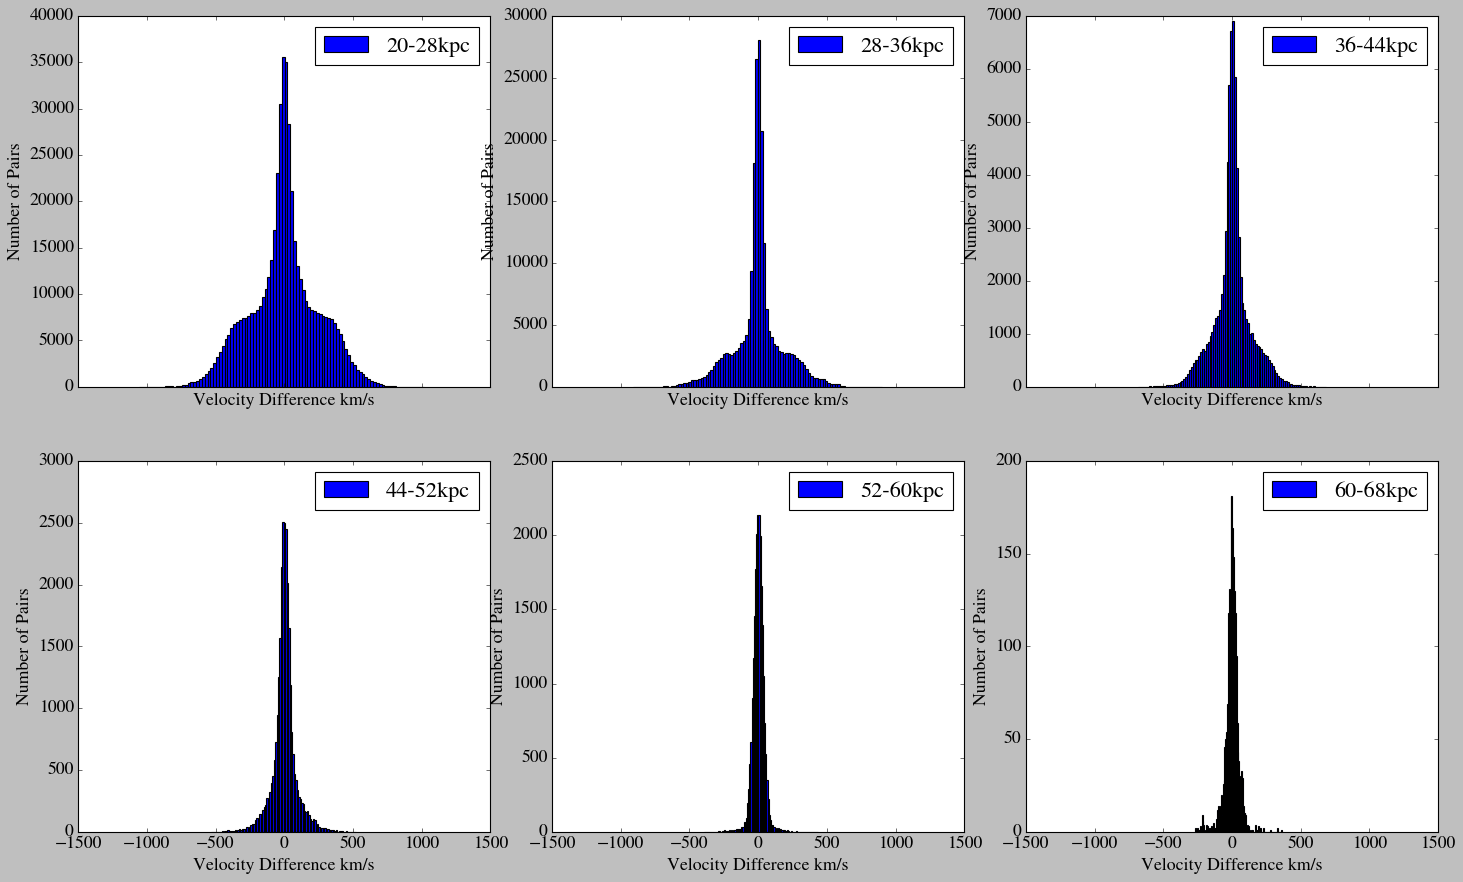

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
sc = 2
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(test1f[sc][k], bins=100, label=str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc')
            

        ax[index][jndex].set_xlabel('Velocity Difference km/s')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend( prop={'size': 20})
        
            
            
        k = k + 1
plt.savefig('halo17_space_2_unbound.png')             
plt.show()

In [10]:
#shell scale = 10 kpc range 2-12 kpc 
s6h = []
s6b = []
for ii in range(0,6):
    hist, bin_edges = np.histogram(test1f[2][ii], density=False,bins=100)
    s6h.append(hist)
    s6b.append(bin_edges)

In [11]:
len(test1f[1])

7

In [19]:
dff = pd.DataFrame()
for sc in range(0,len(test1f)):
    for k in range(0,len(test1f[1])):
        hist, bin_edges = np.histogram(test1f[sc][k], density=False,bins=100)
       
        
    
        dff[str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc y'] = hist
        dff[str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc x'] = bin_edges[:100]


In [20]:
dff.to_csv("test.csv")

In [16]:
#Plotting the histogram for the space separation for each shell (number of the stars in the shell labelled)

fig, ax = plt.subplots(3, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(sep[k], bins=50, label='Number of the stars in the shell is '+str(num[k]))
            
        ax[index][jndex].axvline(6,linewidth = 3,c= 'r')
        ax[index][jndex].set_xlabel('Space Separation kpc')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend(loc=1, prop={'size': 15})
        
            
            
        k = k + 1
plt.savefig('halo17_space_bound.png') 000           
#plt.show()

SyntaxError: invalid syntax (<ipython-input-16-c1689bb4b87e>, line 21)

In [22]:
#shell scale = 10 kpc range 2-12 kpc 
s6h = []
s6b = []
for ii in range(0,5):
    hist, bin_edges = np.histogram(test1f[2][ii], density=False,bins=100)
    s6h.append(hist)
    s6b.append(bin_edges)

In [23]:
data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
df=pd.DataFrame() #creates empty pandas DataFrame
   
keys2=data2.keys() #creates list of keys for the ebf file

In [24]:
def one_gaussian(params,x,ydata):
       
    ''' 
        Function of one Gaussian distribution
        :param params: parameters for the gaussian distribution
        :param x: xdata 
        :param ydata: y data for fitting
        
        return function of the one Gausssian function with the parameters
        
    '''
    h1 = params[0]
    c1 = params[1]
    w1 = params[2]
    offset = params[3]
    
    x,ydata = x,ydata
    ypred = gaussian(x, h1, c1, w1, offset) 
      
    # the log likelihood for the fitting (using possion statistic)
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
   
    return LL 



In [25]:
def two_gaussians(params,x,ydata):
    ''' 
        Function of two Gaussian distribution
        :param params: parameters for the gaussian distribution
        :param x: xdata 
        :param ydata: y data for fitting
        return function of the two Gausssian function with the parameter   
    '''
    h1 = params[0]
    c1 = params[1]
    w1 = params[2]
    h2 = params[3]
    c2 =params[4]
    w2 =params[5]
    offset = params[6]
    sd = params[7]
    #x,ydata = s6b[num][:100],s6h[num]
    ypred = (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0)  + 
        offset)
    ## the log likelihood for the fitting (using possion statistic)
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    
    return LL 
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

In [26]:
def gaussian_likelihood(leng):
    ''' 
        Function of fitting gaussian distribution and find out the two secondary peaks 
        :param leng: number of data set
        
        return plotting of the fitting results and index range of the secondary peaks 
        
    '''
    lowbu = []
    highbu = [] 
    lowbu2=[]
    highbu2= [] 
    for num in range(0,leng):
        guess6= [np.max(s6h[num]),0, 60, np.max(s6h[num])/2 , 0, 120,0,100] 
        x,ydata = s6b[num][:100],s6h[num]
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=yPred, scale=sd) )
        optim1 = minimize(two_gaussians, guess6, method='Nelder-Mead',args=(x,ydata))
        p1 = optim1.x

        ypred = (gaussian(s6b[num][:100], p1[0], p1[1], p1[2], offset=0) +
            gaussian(s6b[num][:100], p1[3], p1[4], p1[5], offset=0)  + p1[6])

        LL = -np.sum(stats.poisson.logpmf(s6h[num], ypred))

        plt.scatter(s6b[num][:100],s6h[num], c='pink', label='measurement', marker='.', edgecolors=None)
        plt.plot(s6b[num][:100],(gaussian(s6b[num][:100], p1[0], p1[1], p1[2], offset=0) +gaussian(s6b[num][:100], p1[3], p1[4], p1[5], offset=0)  + 
        p1[6]), c='b', label='fit of 2 Gaussians')
        plt.title("Two gaussian fitting")
        plt.ylabel("Number of pairs")
        plt.xlabel("Velocity Difference")
        plt.legend(loc='upper left')
#plt.plot(np.array(xnum)[lowi:highi+1], np.array(newdiff)[lowi:highi+1],c='r')
#plt.plot(np.array(xnum2)[highi2:lowi2+1],np.array(newdiff2)[highi2:lowi2+1],c='r')
#plt.savefig('result.png')
        plt.show()
    
        diff = s6h[num]-(gaussian(s6b[num][:100], p1[0], p1[1], p1[2], offset=0) +
        gaussian(s6b[num][:100], p1[3], p1[4], p1[5], offset=0)  + 
        p1[6])
        width = p1[2]

#for ii in range(0,len(diff)):


        newdiff = diff[np.where(s6b[num][:100] > 3*width)]
        newdiff2 = diff[np.where(s6b[num][:100] < -3*width)]
        xnum = s6b[num][:100][np.where(s6b[num][:100] > 3*width)]
        xnum2 = s6b[num][:100][np.where(s6b[num][:100] <  -3*width)]
        lowi = np.array(range(0,100))[np.where(newdiff == np.min(newdiff))][0]
        highi = np.array(range(0,100))[np.where(newdiff == np.max(newdiff))][0]
        lowi2 = np.array(range(0,100))[np.where(newdiff2 == np.min(newdiff2))][0]
        highi2 = np.array(range(0,100))[np.where(newdiff2 == np.max(newdiff2))][0]


       # finaladd = np.append(np.array(newdiff2)[lowi2:highi2],np.array(newdiff)[lowi:highi])
        xnumf = np.append(np.array(xnum2)[lowi2:highi2],np.array(xnum)[lowi:highi])
#plt.plot(np.array(xnum2)[highi2:lowi2+1],np.array(newdiff2)[highi2:lowi2+1])
        plt.scatter(s6b[num][:100],s6h[num], c='pink', label='measurement', marker='.', edgecolors=None)
        plt.plot(s6b[num][:100],s6h[num]-(gaussian(s6b[num][:100], p1[0], p1[1], p1[2], offset=0) +
        gaussian(s6b[num][:100], p1[3], p1[4], p1[5], offset=0)  + 
        p1[6]), c='b', label='fit of gaussian Gaussians')
        plt.title("Two gaussian fitting")
        plt.ylabel("Number of pairs")
        plt.xlabel("Velocity Difference")
        plt.legend(loc='upper left')
        if (lowi < highi+1) &  (highi2 < lowi2+1) :
            plt.plot(np.array(xnum)[lowi:highi+1], np.array(newdiff)[lowi:highi+1],c='r')
            plt.plot(np.array(xnum2)[highi2:lowi2+1],np.array(newdiff2)[highi2:lowi2+1],c='r')
        else:
            
            lowb = lowi
            lowa = highi
            lowi = lowa
            highi = lowb
            
            lowb2 = lowi2
            lowa2 =highi2
            lowi2 = lowa2
            highi2 = lowb2
            plt.plot(np.array(xnum)[lowi:highi+1], np.array(newdiff)[lowi:highi+1],c='r')
            plt.plot(np.array(xnum2)[highi2:lowi2+1],np.array(newdiff2)[highi2:lowi2+1],c='r')
            
            
        print (lowi,highi+1,highi2,lowi2+1)
        plt.show()                        

        lowbu.append(xnum2[highi2])
        lowbu2.append(xnum2[lowi2])
        highbu.append(xnum[lowi])
        highbu2.append(xnum[highi])
        
    return lowbu,lowbu2,highbu,highbu2

    

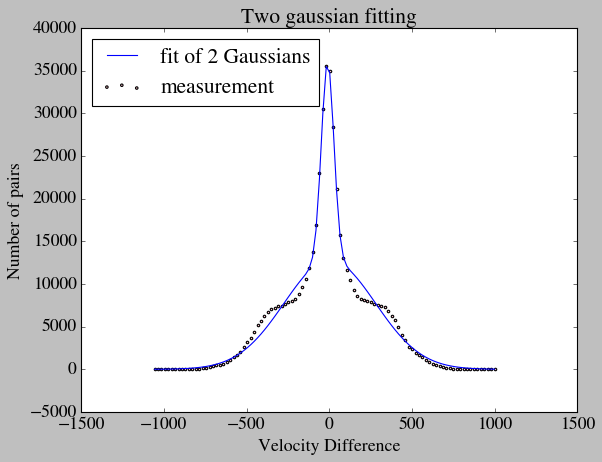

2 12 32 43


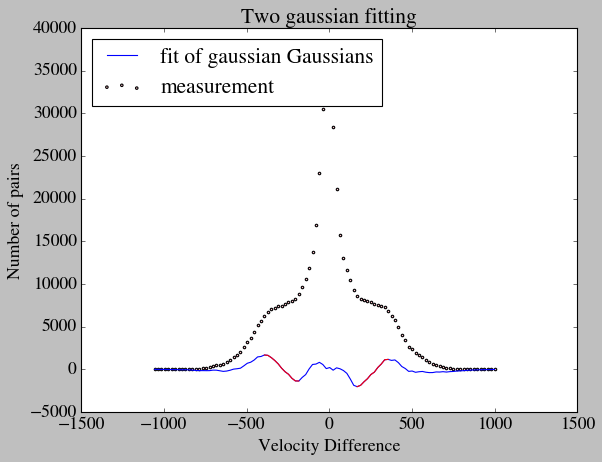

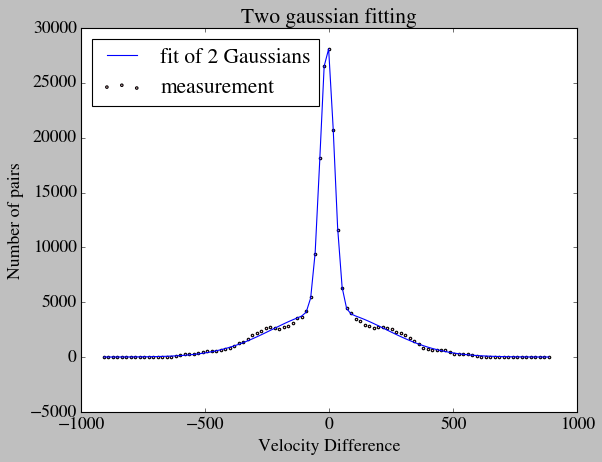

3 10 36 42


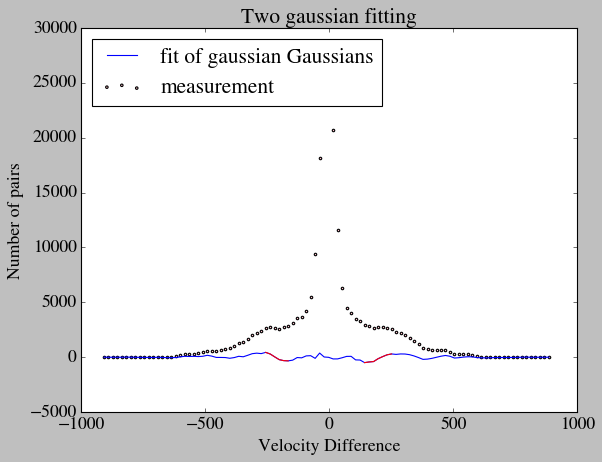

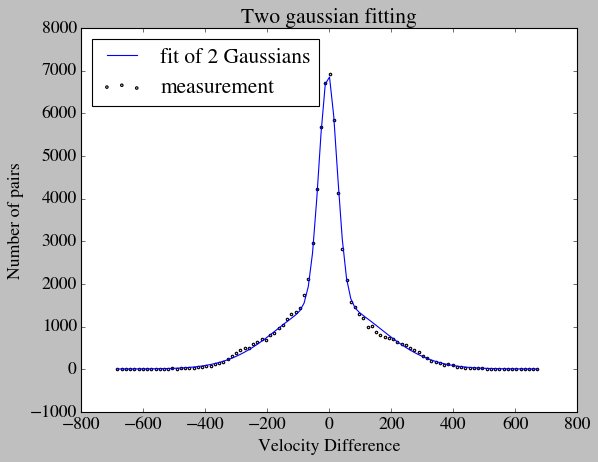

2 12 29 36


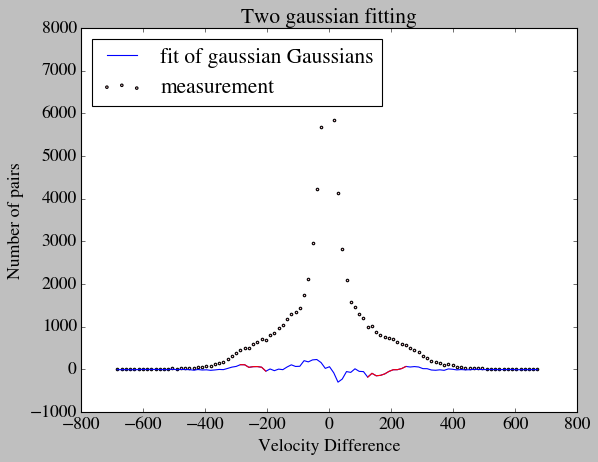

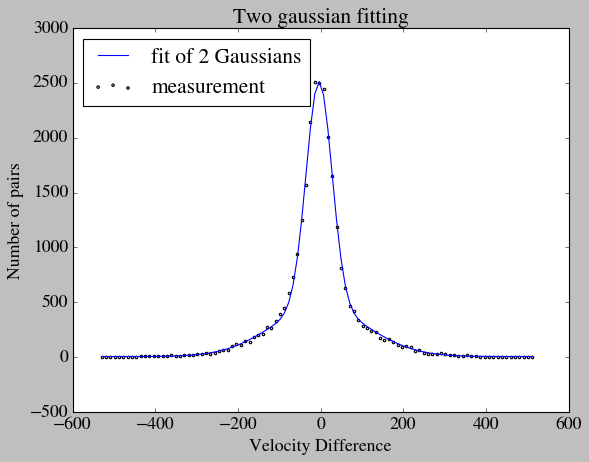

11 5 34 42


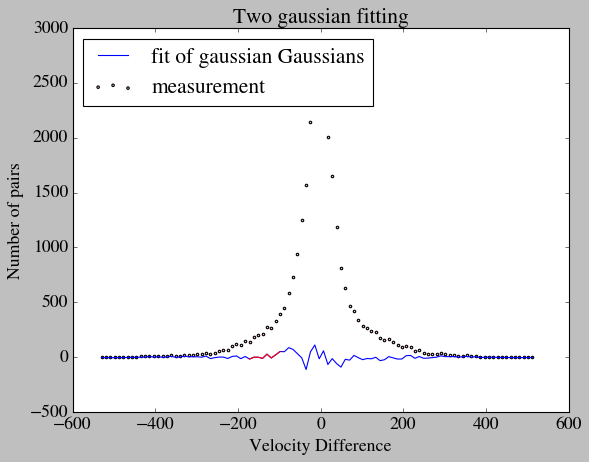

In [27]:
lowb,lowb2,highb,highb2 = gaussian_likelihood(4)

In [29]:
def nstar_position(indexf,vel_diff,times,bins,s6b,s6h):
     ''' 
        Function of locating the index of the star pairs within the narrow peak
        
        :param indexf: the total index in a form of xx-xx for all the stars
        :param vel_diff: all the velocity difference between pairs.   
        :param times: sigma of the narrow gaussian to identify the width of the distribution
        :param bins: bins of the data
        :param s6b,s6h: binned data for the hist of vdiff 
        
    
        return indexoutot (all the indexs for the stars), indexstot (all the indexs inside the narrow peak),
        overlaptot (indexs shown in the narrow and outside the narrow peak), narrowtotal (indexs only shown in the narrow peak),
        optim (optimized parameters for the guassian distribution fitting)
        
    '''
    indexstot = []
    narrowtotal = []
    overlaptot = []
    indexoutot = [ ]
    optim = []
    integrer = []
    f = open("halo17_file_lowmass.txt", "a")
    for ii in range(0,len(s6b)):
        
        #print (ii)
        result,chisq,success1,ratio = fitting_result(s6b[ii][:bins],s6h[ii],np.max(s6h[ii]),20, 60, np.max(s6h[ii])/2 , 20, 120,0,bins,1)
        optim.append(np.append(result,chisq))
       
        
        #result = integrate.quad(lambda x: , 0, 4.5)
        
        indexout = indexf[ii][(np.absolute(vel_diff[ii]) > times*width)]

        indexcut = indexf[ii][(vel_diff[ii] < times*width) & (vel_diff[ii] > -times*width)]

        indexoutt = []
        indexs = []
        for item in indexout:
            indexoutt.append(int(item[:item.find('-')]))
            indexoutt.append(int(item[item.find('-')+1:]))

        indexoutot.append(indexoutt)
        for item in indexcut:
            indexs.append(int(item[:item.find('-')]))
            indexs.append(int(item[item.find('-')+1:]))
        
        
            
        overlap = []

        for item1 in np.unique(indexoutt):
            for item2 in np.unique(indexs):
                if item1 == item2:
                    overlap.append(item2)
        totaln = []
        uniqueid =  []



        for ii in range(0,len(indexs)):
            n = 0 
            for item1 in overlap:
                if indexs[ii] == item1:
                    n=n+1
      
      

            if n ==0:
        
            
                uniqueid.append(indexs[ii])
            totaln.append(n)
        indexstot.append(np.ravel(indexs))
        overlaptot.append(np.ravel(indexs)[np.isin(np.ravel(indexs),overlap)])
        narrowtotal.append(np.ravel(uniqueid))
        
    f.close()  
    return indexoutot,indexstot,overlaptot,narrowtotal,optim
        
        
        


            
        
        
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [30]:
def load_index(vel_diff,indexf,lowv,highv,lowv2,highv2):
    ''' 
        Function of locating the index of the star pairs within the two secondary peak
        
        :param indexf: the total index in a form of xx-xx for all the stars
        :param vel_diff: all the velocity difference between pairs.   
        :param lowv: lower bound for the first secondary peak (negative vdiff) 
        :param bins: higher bound for the second secondary peak (positive vdiff)
        
        
    
        return indexoutot (all the indexs for the stars outside the narrow peak), indexstot (all the indexs inside the peaks),
        overlaptot (indexs shown in the narrow and outside the peaks), narrowtotal (indexs only shown in the peaks)    
    '''
    indexstot = []
    narrowtotal = []
    overlaptot = []
    indexoutot = [ ]
  
    print(lowv,highv,lowv2,highv2)
    
   
    
    
    

    #indexcut = indexf[(((vel_diff > lowv) & (vel_diff < highv)) or ((vel_diff > lowv2) & (vel_diff < highv2)))] 
    indexcut = np.append(indexf[((vel_diff  > lowv) & (vel_diff < highv))], indexf[((vel_diff > lowv2) & (vel_diff < highv2))]) 
    
    indexout1 = np.append(indexf[(vel_diff < lowv)],indexf[(vel_diff > highv) & (vel_diff < lowv2)])
    
    indexout = np.append(indexout1,indexf[(vel_diff > highv2)])
    
    
    print (indexout)
    indexoutt = []
    indexs = []
    for item in indexout:
        indexoutt.append(int(item[:item.find('-')]))
        indexoutt.append(int(item[item.find('-')+1:]))

    indexoutot.append(indexoutt)
    for item in indexcut:
        indexs.append(int(item[:item.find('-')]))
        indexs.append(int(item[item.find('-')+1:]))
        
        
            
    overlap = []

    for item1 in np.unique(indexoutt):
        for item2 in np.unique(indexs):
            if item1 == item2:
                overlap.append(item2)
    totaln = []
    uniqueid =  []



    for ii in range(0,len(indexs)):
        n = 0 
        for item1 in overlap:
            if indexs[ii] == item1:
                n=n+1
      
      

        if n ==0:
        
            
            uniqueid.append(indexs[ii])
        totaln.append(n)
    indexstot.append(np.ravel(indexs))
    overlaptot.append(np.ravel(indexs)[np.isin(np.ravel(indexs),overlap)])
    narrowtotal.append(np.ravel(uniqueid))
    
    return indexoutot,indexstot,overlaptot,narrowtotal

In [31]:
indexf[2][2]

array(['0-1600', '0-1619', '0-1720', ..., '22341-22393', '22355-22401',
       '22398-22401'], dtype='<U11')

In [32]:
indexoutot,indexstot,overlaptot,narrowtotal = [],[],[],[]
for ii in range(0,4):

    indexoutoti,indexstoti,overlaptoti,narrowtotali = load_index(test1f[2][ii],indexf[2][ii],lowb[ii],lowb2[ii],highb[ii],highb2[ii])
    indexoutot.append(indexoutoti)
    indexstot.append(indexstoti)
    overlaptot.append(overlaptoti)
    narrowtotal.append(narrowtotali)


-392.06063656959213 -184.37174762743575 168.69936357423012 355.6193636221708
['5-916' '6-161' '6-2175' ... '22276-22356' '22320-22406' '22345-22406']
-256.2704906020915 -165.66435033737946 142.39652656264184 251.12389488029635
['1-1181' '1-1746' '1-2957' ... '22145-22212' '22196-22346' '22292-22385']
-286.71749221864 -204.57363041218343 124.00181681364313 247.21760952332806
['0-6215' '0-10987' '0-16734' ... '21462-21923' '21462-22015'
 '21687-21775']
-171.74295681293222 -98.04011794630662 217.82919148208873 144.12635261546313
['29-16061' '29-16756' '45-8637' ... '21720-22175' '21980-22000'
 '22084-22404']


In [23]:
#plotting narrow peak star satellite properties
def sate_narrow_plot(rlim,inputid,df3,totalstarid,totaldata,satlow,sathigh,radius,interval):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    fig, ax = plt.subplots(2, 2, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[k]))]
            

            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue))
            
            #print (satidunqiue)
            #print (staridf,satidunqiue)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh][satidcut],data2['tsat'][satlow:sathigh][satidcut],marker='o', c='b',s=data2['msat'][satlow:sathigh][satidcut]/10E8, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    fig, ax = plt.subplots(2, 2, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            staridf = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )])]

            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue))
            
            #print (staridf,satidunqiue)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh][satidcut],data2['tsat'][satlow:sathigh][satidcut],marker='o', c='b',s=data2['msat'][satlow:sathigh][satidcut]/10E8, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrection Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
    plt.show()
    
        
        
             
        
        
        
            
            
        
        
        
        
        
    
    
        
   
        
        

In [24]:
#plotting narrow peak star satellite properties
def sate_narrow_plot_2(rlim,inputid,df3,totalstarid,totaldata,satlow,sathigh,radius,interval):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            satmass = [] 
            satmass2 = []
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[k]))]
            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]
            sattot = np.arange(satlow,sathigh)
            
            staridf2 = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )])]

            satidunqiue2 = testd['satid'][np.isin(totalstarid,staridf2)]

            satidcut2 = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue2))
            print (len(data2['msat'][satlow:sathigh][satidcut2]))
            for kk in range(0,len(sattot)):
                satmass.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue[satidunqiue==sattot[kk]]))
                satmass2.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue2[satidunqiue2==sattot[kk]]))
                           
                                           

                     #satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),satidunqiue)
            #print (len(np.ravel(np.nonzero(satmass))))
            
            #print (np.ravel(satmass)/10**12-np.ravel(satmass2)/10**12)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh],data2['tsat'][satlow:sathigh],marker='o', c='b',s=(np.absolute(np.ravel(satmass)-np.ravel(satmass2)))/10**11, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
    #plt.show()
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    j=0
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            satmass = [] 
            satmass2 = []
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[j]))]
            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]
            sattot = np.arange(satlow,sathigh)
            
            staridf2 = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[j] < df3['r']) & (df3['r']<rlim[j]+interval )])]

            satidunqiue2 = list(set(testd['satid'][np.isin(totalstarid,staridf2)])-set(testd['satid'][np.isin(totalstarid,staridf)]))
            satidunqiue3 = testd['satid'][np.isin(totalstarid,staridf2)][np.isin(testd['satid'][np.isin(totalstarid,staridf2)],satidunqiue2)]
            #satidcut2 = testd['satid'][np.isin(totalstarid,staridf2)][np.isin(testd['satid'][np.isin(totalstarid,staridf2)],np.unique(satidunqiue2))]
            #print (len(satidunqiue),len(satidunqiue3))
            for kk in range(0,len(sattot)):
                satmass.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue[satidunqiue==sattot[kk]]))
                satmass2.append(data2['msat'][satlow:sathigh][kk]*len(np.array(satidunqiue3)[satidunqiue3==sattot[kk]]))
                           
                                           

                     #satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),satidunqiue)
            #print (np.ravel(satmass2)-np.ravel(satmass))
            
        
            #ax[index][jndex].scatter(data2['tsat'][satlow:sathigh], np.ravel(satmass)/np.ravel(satmass2)*100000, label=str(int(radius[j])) +'-'+ str(int(radius[j]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh],data2['tsat'][satlow:sathigh],marker='o', c='b',s=(np.absolute(np.ravel(satmass)-np.ravel(satmass2)))/10**11, label=str(int(radius[j])) +'-'+ str(int(radius[j]+8))+'kpc')
            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            j = j + 1
    plt.show()
#plt.savefig('halo17_space_2_unbound.png')             
 

67
56
47
42
39
35


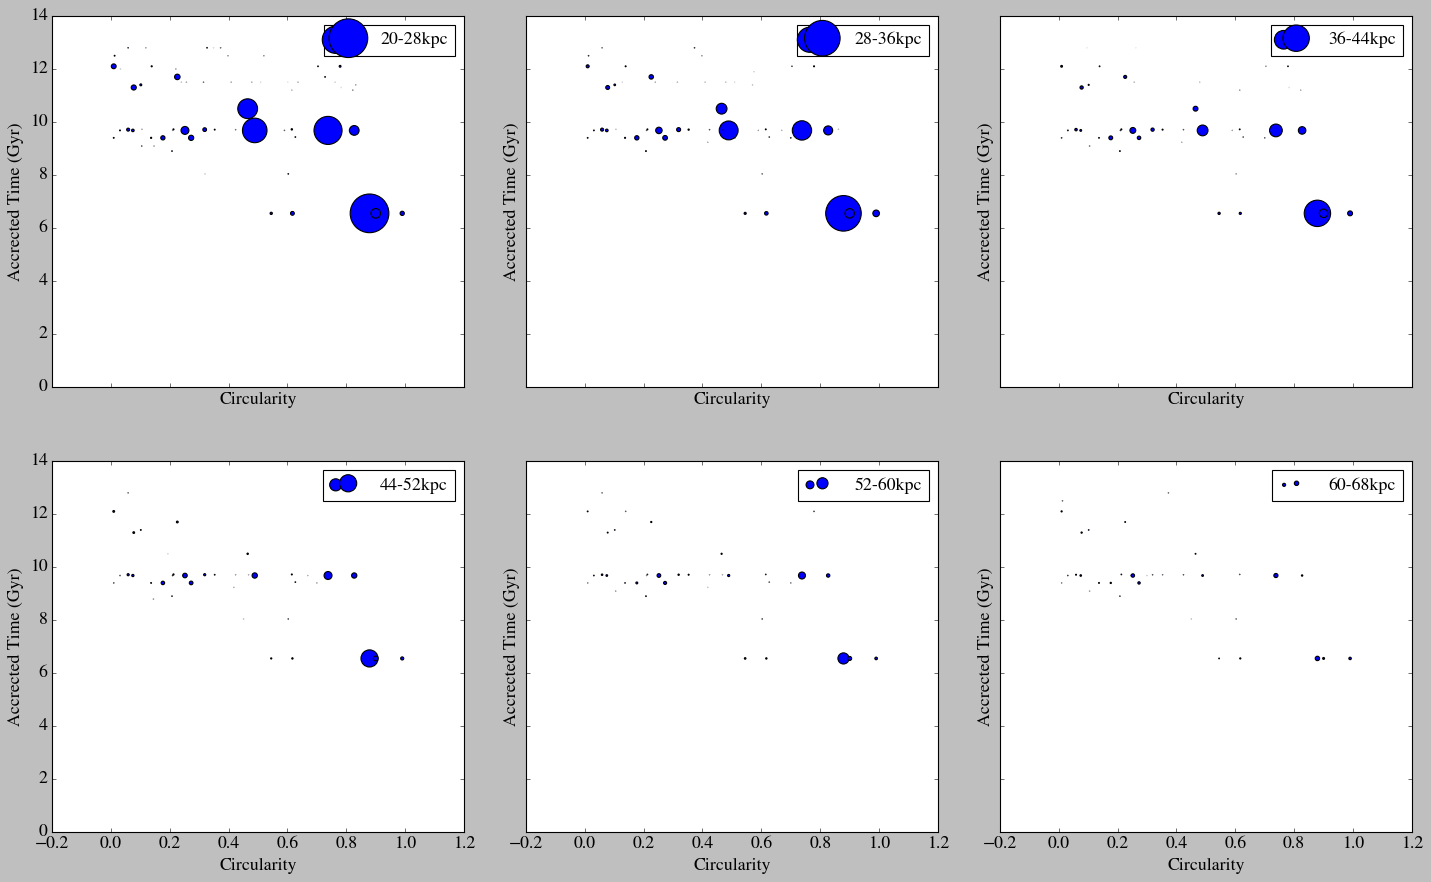

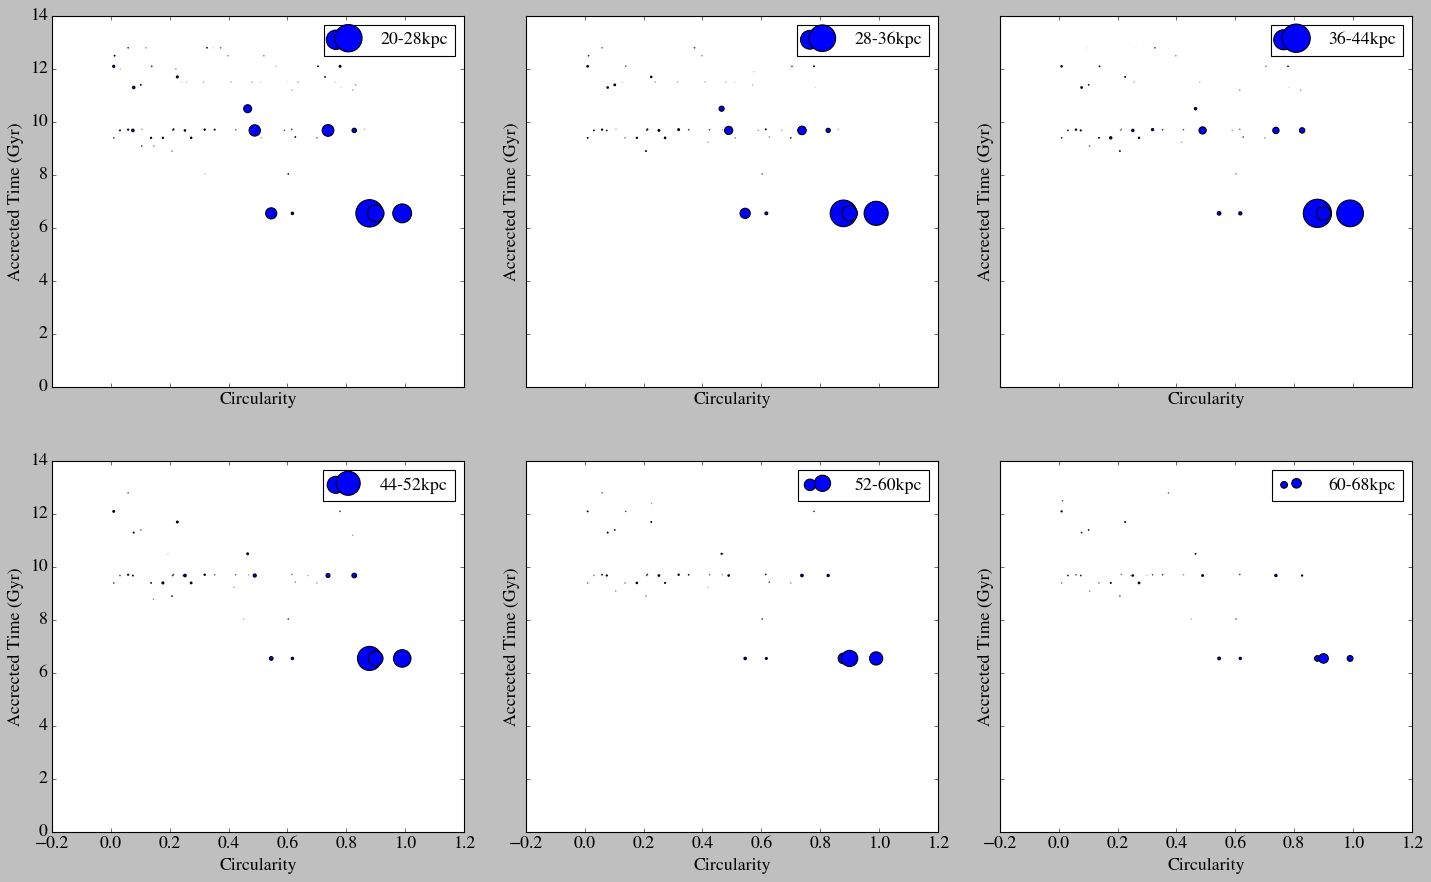

In [228]:
sate_narrow_plot_2(rlim,finalid,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

11       1254
14       1225
20       1239
31       1254
49       1223
56       1253
59       1257
63       1223
69       1253
94       1228
108      1248
111      1225
113      1224
120      1257
122      1223
139      1228
148      1254
152      1239
164      1253
184      1248
190      1223
197      1267
200      1267
205      1228
235      1228
238      1224
242      1223
244      1267
252      1224
254      1267
         ... 
59766    1223
59772    1253
59775    1253
59778    1225
59791    1274
59793    1223
59810    1247
59814    1253
59821    1254
59823    1225
59831    1253
59841    1223
59855    1223
59856    1223
59866    1223
59872    1228
59885    1267
59918    1223
59921    1224
59933    1248
59934    1223
59941    1269
59942    1248
59946    1254
59947    1225
59953    1299
59965    1228
59970    1239
59982    1249
59989    1223
Name: satid, Length: 7404, dtype: int32
0        1249
5        1223
6        1224
10       1225
19       1249
23       1225
45       1224
48      

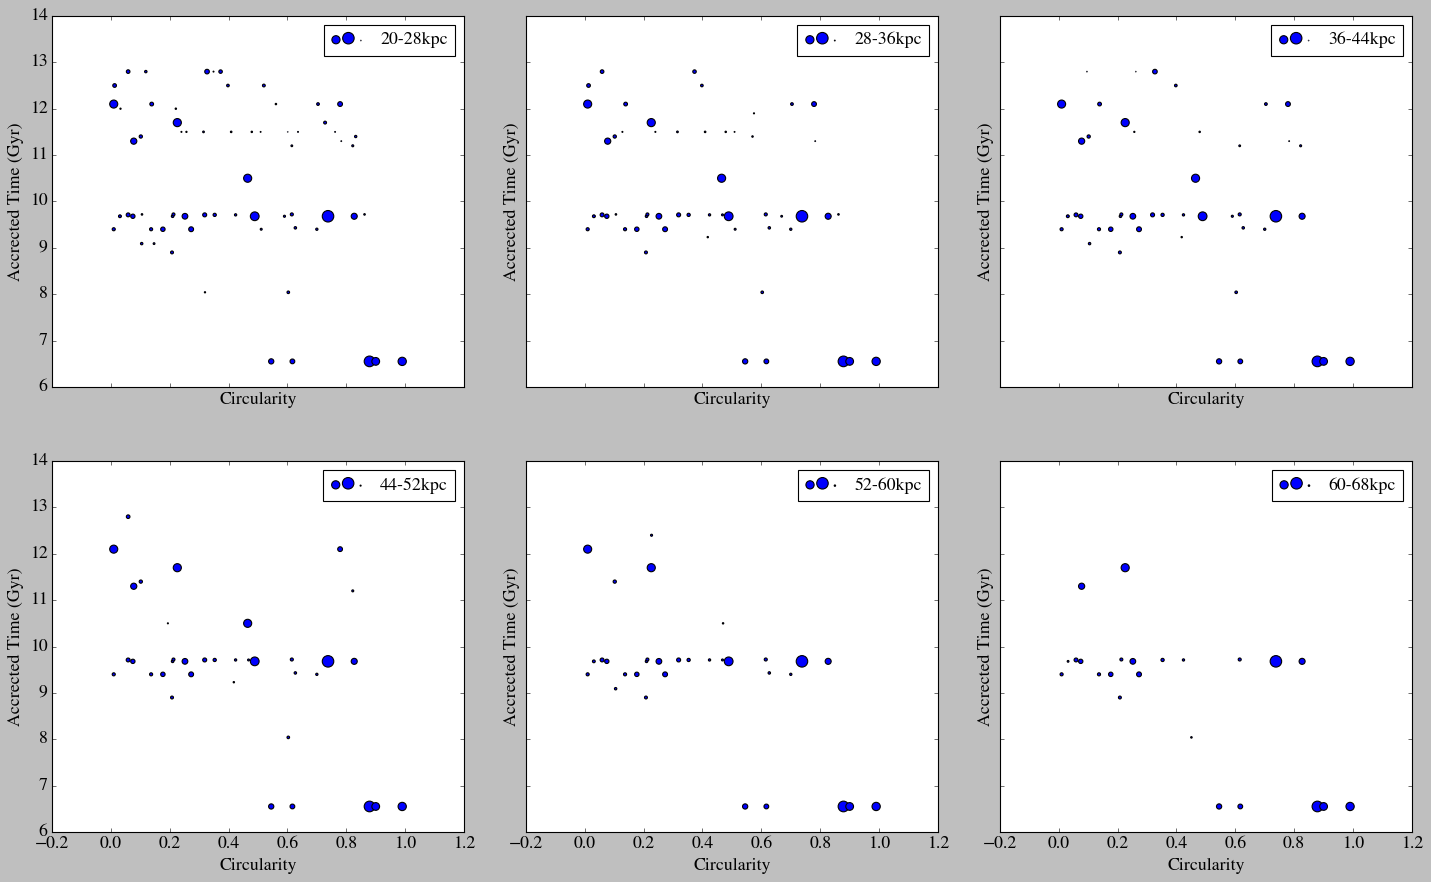

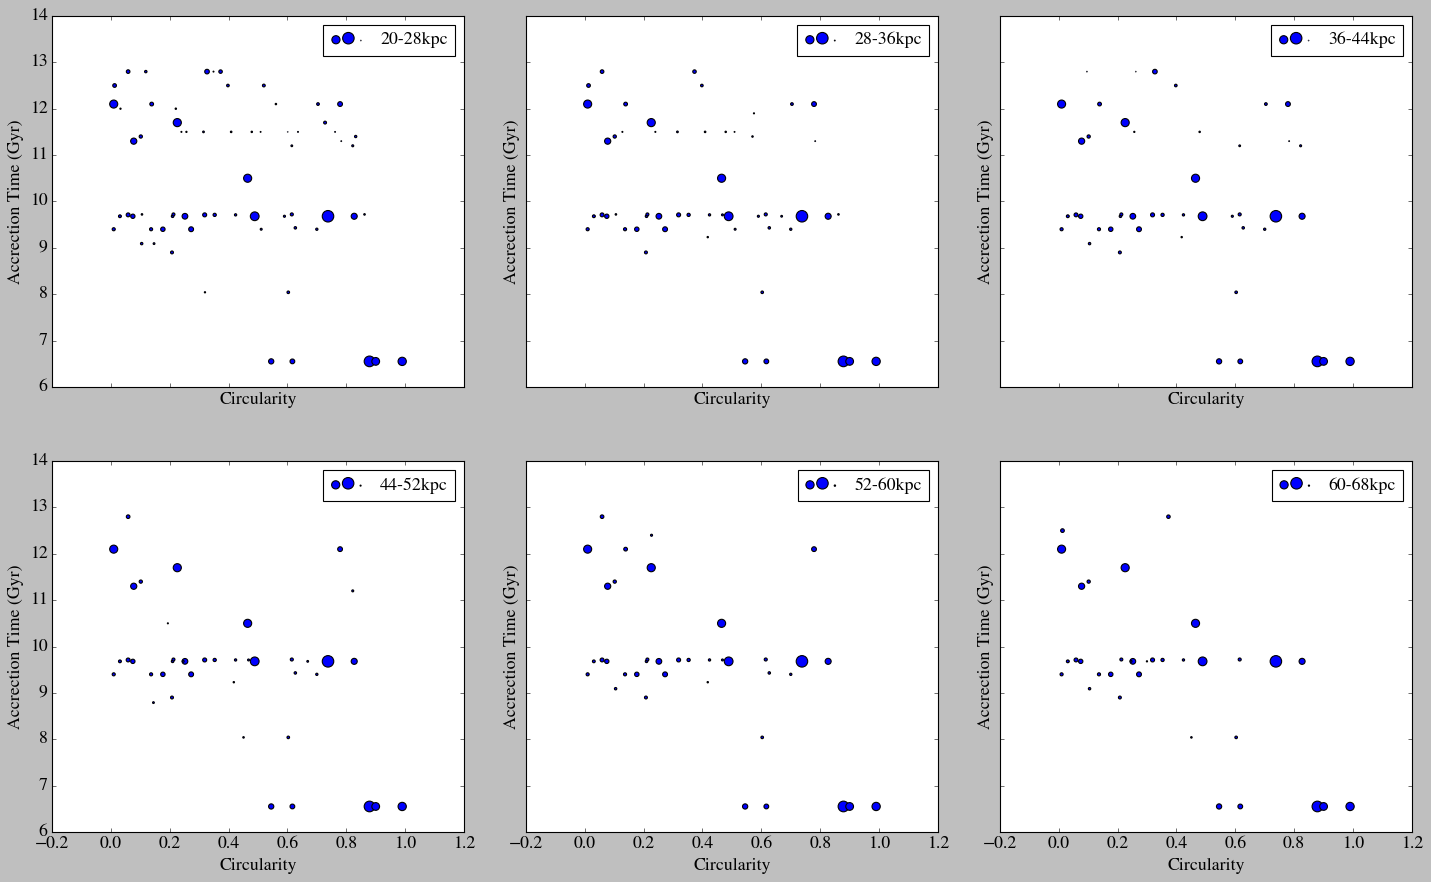

In [150]:
sate_narrow_plot(rlim,indexstot,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

In [36]:
#plotting narrow peak star position properties
def twod_narrow_plot(inputid,df3,radius):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 18), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            dff = df3[df3['index'].isin(np.unique(inputid[k]))]
            ax[index][jndex].scatter(df3['y'],df3['z'],marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            ax[index][jndex].scatter(dff['y'],dff['z'],c=dff['Vgal'],cmap=coolwarm,marker='^',label = 'Stars in the sample '+str(int(radius[k])) +'-'+ str(int(radius[k]+8))+' kpc')

            
            ax[index][jndex].set_xlabel('Y (Kpc)')
            ax[index][jndex].set_ylabel('Z (Kpc)')
            #ax[index][jndex].set_zlabel('Z Label')
            ax[index][jndex].set_ylim(-75,75)
            ax[index][jndex].set_xlim(-75,75)
            #ax[index][jndex].set_zlim(-75,75)
            ax[index][jndex].legend(loc=4,prop={'size': 13})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    

In [51]:
#plotting narrow peak star position properties
def twod_narrow_plot(inputid,df3,radius):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 18), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            dff = df3[df3['index'].isin(np.unique(inputid[k]))]
            ax[index][jndex].scatter(df3['y'],df3['z'],c='k',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            cset1 = ax[index][jndex].scatter(dff['y'],dff['z'],c=dff['Vgal'],marker='^',label = 'Stars in the sample '+str(int(radius[k])) +'-'+ str(int(radius[k]+8))+' kpc')
            fig.colorbar(cset1, ax=ax[index][jndex])
            
            ax[index][jndex].set_xlabel('Y (Kpc)')
            ax[index][jndex].set_ylabel('Z (Kpc)')
            #ax[index][jndex].set_zlabel('Z Label')
            ax[index][jndex].set_ylim(-75,75)
            ax[index][jndex].set_xlim(-75,75)
            #ax[index][jndex].set_zlim(-75,75)
            ax[index][jndex].legend(loc=4,prop={'size': 13})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    

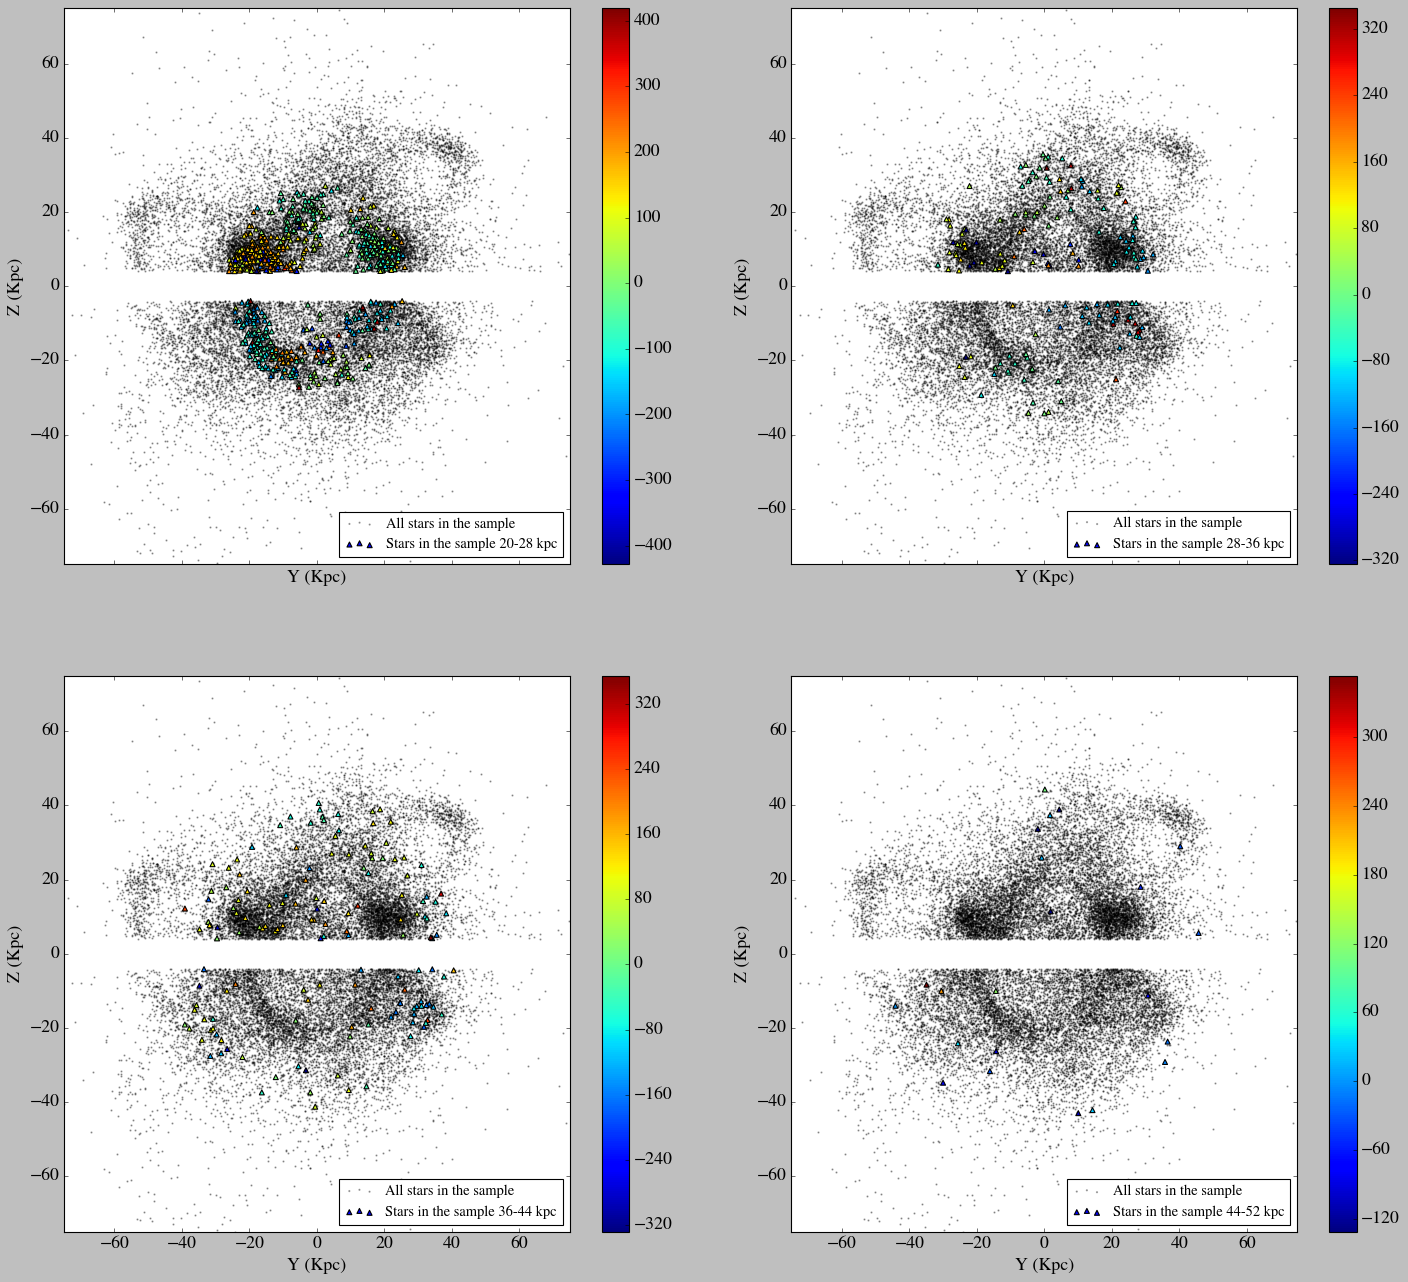

In [52]:
twod_narrow_plot(finaid,df3,rlimf[2])



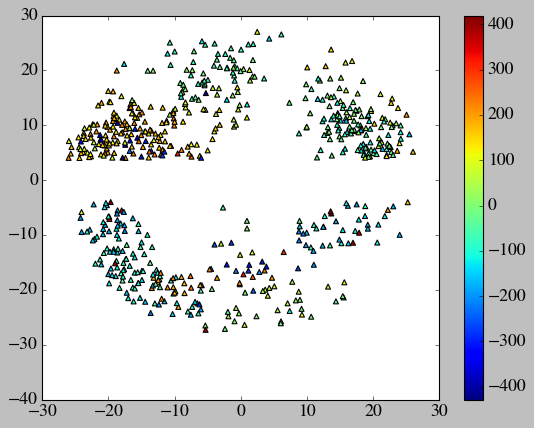

In [46]:
dff = df3[df3['index'].isin(np.unique(finaid[0]))]
plt.scatter(dff['y'],dff['z'],c=dff['Vgal'],marker='^',label = 'Stars in the sample '+str(int(rlimf[2][0])) +'-'+ str(int(rlimf[2][0]+8))+' kpc')
plt.colorbar()
plt.show()





In [37]:
len(np.sort(indexoutot[0]))

1

In [28]:
#plotting narrow peak star histogram properties
def threed_narrow_hist(inputidal,indexoutot):
    
    
    
    
    #idtotal = df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )]
    #subplot_args = {'projection':'3d'}
    fig, ax = plt.subplots(2, 2, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    finalid = []
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            outfre = []
            unique_id, counts_elements = np.unique(inputidal[k], return_counts=True)
            
            for item in unique_id:
                nn = 0
                for item2 in indexoutot[k]:
                    print (indexoutot[k])
                    if item == item2:
                        nn=nn+1
                outfre.append(nn)
            
            
            finalid.append(unique_id[(counts_elements-outfre) > 0])
            
    
    
            #outfre = [len(list(unique_id)) for key, group in groupby(indexoutot[k])]
            #print (len(unique_id), len(counts_elements),len(indexoutot[k]))
            
            #ax[index][jndex].plot(unique_id,counts_elements-outfre,c='r',label = 'Difference between two frequency')
            #ax[index][jndex].plot(unique_id,outfre)
            
            #ax[index][jndex].set_xlabel('Star-ID')
            #ax[index][jndex].set_ylabel('Count Number')
            

           
    
            #ax[index][jndex].legend(prop={'size': 16})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    
    return finalid 
    

In [ ]:
 finalid  = threed_narrow_hist(np.ravel(indexstot)[:2],np.ravel(indexoutot)[:2])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [35]:
np.ravel(indexstot)[0]

array([    5,  9056,     5, ..., 22386, 22387, 22410])

In [36]:
inputidal= np.ravel(indexstot)[0]


In [40]:
def getting_findex(inputidal,indexoutot):
    ''' 
        Function of calculating the stars appear more frequently inside one peak than the outside peak
        
        :param inputidal: the indexs for the stars inside the narrow peak
        :param indexoutot: the indexs for the stars outside the narrow peak  
       
    
        return finalid (indexs appear more frequently inside the peaks
        plot of the frequency of the stars appear inside and outside the narrow peak
    '''
   
    outfre = []
    unique_id, counts_elements = np.unique(inputidal, return_counts=True)
    finalid4 = []
    for item in unique_id:
        nn = 0
        for item2 in np.ravel(indexoutot):
        #print (item2)
            if item == item2:
                nn=nn+1
        outfre.append(nn)
            
            
    finalid4.append(unique_id[(counts_elements-outfre) > 0])
            
    
    
           
            
    plt.plot(unique_id,counts_elements-outfre,c='r',label = 'Difference between two frequency')
            #ax[index][jndex].plot(unique_id,outfre)
            
    plt.xlabel('Star-ID')
    plt.ylabel('count Number')
            
         

           
    
    plt.legend(prop={'size': 16})

        
            
            
      
           
    plt.show()
    
    return finalid4
    

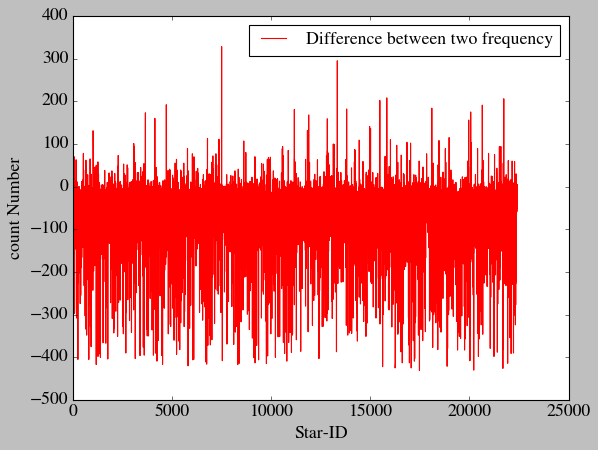

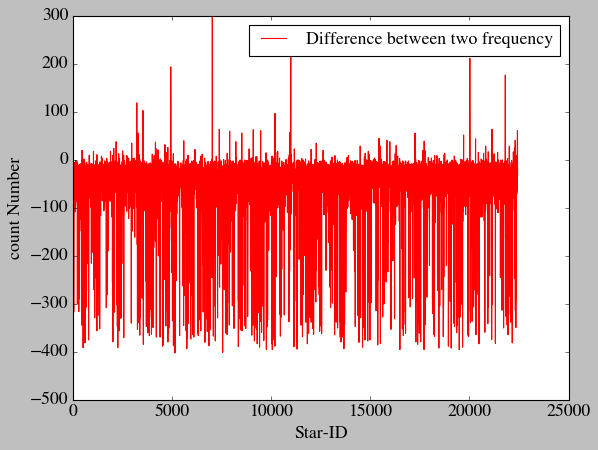

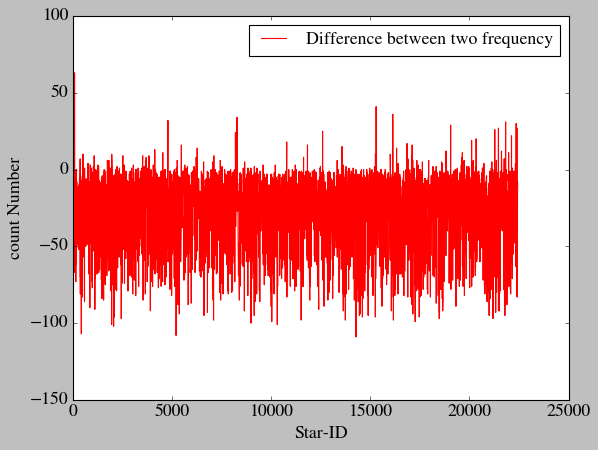

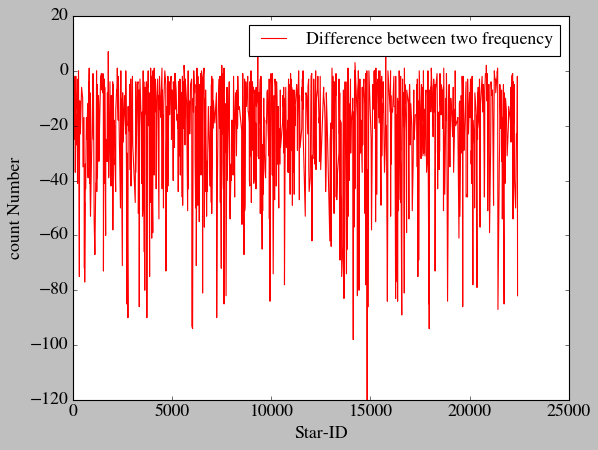

In [41]:
finaid = []
for ii in range(0,len(indexstot)):
    finaid.append(getting_findex(np.ravel(indexstot)[ii],np.ravel(indexoutot)[ii]))

In [ ]:
len(finalid2[0])

In [ ]:
#loading the satellites for the stars inside the narrow peak (secondary peak)
sate_narrow_plot(rlim,finaid,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

In [ ]:
df3

In [ ]:
# 2d plot for stars inside the peaks 
# color code by velocity 
twod_narrow_plot(finaid,df3,rlim)

In [ ]:
threed_narrow_plot(finaid,df3)

In [581]:
uniindex = list(set(df3['index'][ (60 < df3['r'] ) & (df3['r'] < 68 )])-set(finalid[5]))

In [582]:
len(uniindex)

205

# Stellar Mass of Satellites

In [28]:
len(data2['msat'])

1515

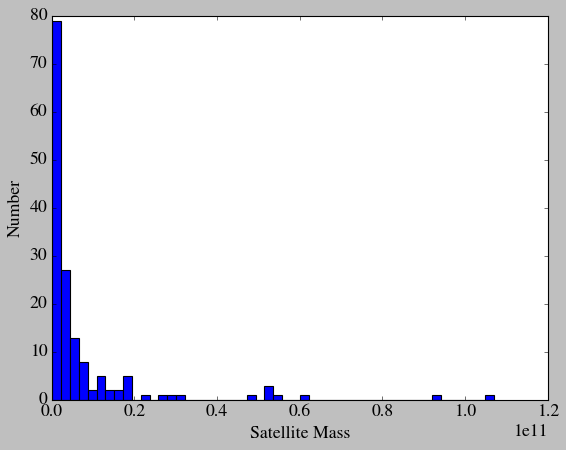

In [80]:
plt.hist(data2['msat'][1211:(1515-149)],bins=50)
plt.xlabel('Satellite Mass')
plt.ylabel('Number')
plt.show()

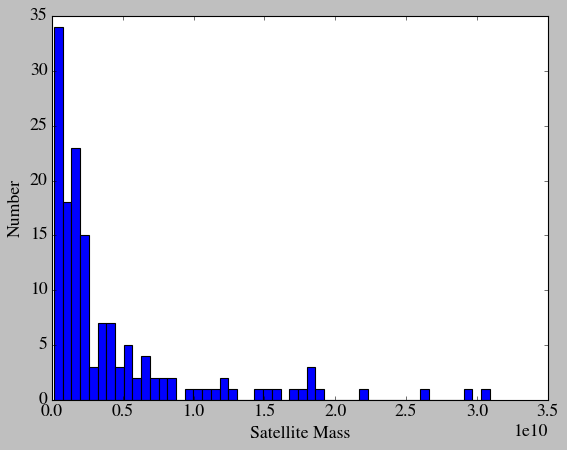

In [31]:
plt.hist(data2['msat'][1211:(1515-149)][data2['msat'][1211:(1515-149)] < 0.4e11],bins=50)
plt.xlabel('Satellite Mass')
plt.ylabel('Number')
plt.show()